In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import Rbf
import os 

In [7]:
#Project 3D coordinates into 2D coordinates using azimuthal projection

#Function reads in coordinates from file, returns dictionary that maps electrode (eg F3-F4 => (.3,.3,.5))
#each file line must be "name X Y Z" where X, Y, Z are 3D cartesian coordinates of node 

def loadCoordinates():
    fileObject = open("/Users/gustavochavez/Documents/GitHub/CS221Project/Converting_3D/coordinates_eeg.txt")
    text = fileObject.readlines()
    end = len(text)
    currentLine = 0
    dictionarySingle = {}
    #Go through each line of file, and add entry to dictionary 
    while (currentLine < end):
        line = text[currentLine].split()
        
        currentLine = currentLine + 1
        dictionarySingle[line[0]] = tuple([float(i) for i in line[1:]])
    eegDuoList = ["F4-C4", "C3-P3", "P7-O1", "P8-O2", "F7-T7", "Fz-Cz", "F3-C3", "Fp2-F8", "Fp2-F4", "P3-O1", "T7-P7", "Cz-Pz", "C4-P4", "P4-O2", "Fp1-F7", "Fp1-F3"]
    dictionaryDuo = {}
    #for each duo of eeg nodes, find the average between the two points and save in new dictionary
    for duo in eegDuoList:
        duoArray = duo.split("-")
        coordinates1 = dictionarySingle[duoArray[0]]
        coordinates2 = dictionarySingle[duoArray[1]]
        l = [coordinates1, coordinates2] 
        #will be p
        newCoordinate =  tuple([sum(x)/2 for x in zip(*l)])
        dictionaryDuo[duo] = newCoordinate
        
    return dictionaryDuo 
d = loadCoordinates()
print(d)

{'Fp2-F8': (0.5586765, 0.7689520000000001, -0.034899), 'Fp2-F4': (0.426918, 0.8117525, 0.2325505), 'F4-C4': (0.6321734999999999, 0.336514, 0.597329), 'C4-P4': (0.6321734999999999, -0.336514, 0.597329), 'P8-O2': (0.5586765, -0.7689520000000001, -0.034899), 'F3-C3': (-0.6321734999999999, 0.336514, 0.597329), 'Fz-Cz': (0.0, 0.35967, 0.847329), 'Fp1-F7': (-0.5586765, 0.7689520000000001, -0.034899), 'C3-P3': (-0.6321734999999999, -0.336514, 0.597329), 'P7-O1': (-0.5586765, -0.7689520000000001, -0.034899), 'F7-T7': (-0.9039575, 0.2937135, -0.034899), 'P4-O2': (0.426918, -0.8117525, 0.2325505), 'Cz-Pz': (0.0, -0.35967, 0.847329), 'P3-O1': (-0.426918, -0.8117525, 0.2325505), 'Fp1-F3': (-0.426918, 0.8117525, 0.2325505), 'T7-P7': (-0.9039575, -0.2937135, -0.034899)}


In [8]:
x = []
y = []
z = [270.00, 77.70, 356.00, 72.50, 294.00, 76.60, 399.00, 116.00, 344.00, 103.00, 301.00, 79.50, 310.00, 97.10, 566.00, 115.00]

for k in d:
    x.append(d[k][0]) 
    y.append(d[k][1])
ti = np.linspace(-1.0, 1.0, 16)
XI, YI = np.meshgrid(ti, ti)


In [9]:
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

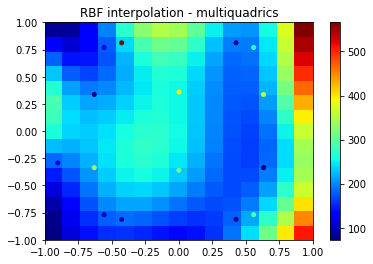

In [10]:
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 16, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.colorbar()
plt.show()

In [11]:
ZI.reshape((1,256))

array([[ -7.05741295e+02,  -4.53555968e+02,  -2.72816352e+02,
         -1.77644052e+02,  -1.61622297e+02,  -2.00174837e+02,
         -2.57052463e+02,  -2.92649741e+02,  -2.71389905e+02,
         -1.66105161e+02,   4.12080480e+01,   3.61414692e+02,
          8.01374805e+02,   1.36654867e+03,   2.06212077e+03,
          2.89256638e+03,  -6.72264662e+02,  -3.92789708e+02,
         -1.71659407e+02,  -3.25403120e+01,   2.03861533e+01,
          1.91797346e+00,  -5.89029235e+01,  -1.25844695e+02,
         -1.62328290e+02,  -1.36051288e+02,  -2.06806962e+01,
          2.04755725e+02,   5.57396103e+02,   1.05165780e+03,
          1.69924200e+03,   2.50810871e+03,  -5.86528416e+02,
         -3.06969332e+02,  -6.57139815e+01,   1.05136852e+02,
          1.90462476e+02,   1.93704913e+02,   1.34438864e+02,
          4.32792667e+01,  -4.38199747e+01,  -9.01239264e+01,
         -6.07904023e+01,   7.59992000e+01,   3.48518555e+02,
          7.80728849e+02,   1.39094165e+03,   2.19017829e+03,
        

#### Plan 

1. Load each file into CSV file 
2. read each line, for each line do RBF on [0,16] and [16,32]
3. Save new dataframe with each 1st RBF being [0,1024] and [1024,2048]
4. After all done, save as csv file into new directory 


In [15]:
#this function takes in CSV file directiory and saves a CSV file where each row 
# is two 2D EEG representations one for each filter bank 
def create2Drepresentations(directory,file):
    data = np.loadtxt(open(directory + file, "rb"), delimiter=",")
    H,W = data.shape
    newData = np.zeros((H,512))
    print(data.shape)
    for row in range(0,H):
        rbf = Rbf(x,y,data[row,0:16],epsilon=2)
        ZI = rbf(XI, YI)
        rbf = Rbf(x,y,data[row,16:32],epsilon=2)
        ZI2 = rbf(XI,YI)
        ZI = ZI.reshape((1,256))
        ZI2 = ZI2.reshape((1,256))
        ZI = np.hstack((ZI,ZI))
        newData[row] = ZI
    np.savetxt("/Users/gustavochavez/Desktop/Data/" + file,newData,delimiter =",")

In [66]:
data =  np.loadtxt(open("/Users/gustavochavez/Downloads/Data.csv", "rb"), delimiter=",")

In [67]:
data.shape

(1800, 2048)

In [16]:
#this functions goes through all data to 
def convertAllData():
    directory = "/Users/gustavochavez/Documents/GitHub/CS221Project/feature_extraction_output/"
    files = [s for s in os.listdir(directory) if "chb" in s]
    
    for file in files:
        print("Processing " + file)
        create2Drepresentations(directory, file)
convertAllData()

Processing chb13_24.edf.csv
(1800, 34)
Processing chb02_12.edf.csv
(1800, 34)
Processing chb11_01.edf.csv
(1799, 34)
Processing chb02_02.edf.csv
(1800, 34)
Processing chb11_11.edf.csv
(1800, 34)
Processing chb10_38.edf.csv
(3600, 34)
Processing chb10_28.edf.csv
(3600, 34)
Processing chb09_16.edf.csv
(6795, 34)
Processing chb09_06.edf.csv
(7199, 34)
Processing chb18_30.edf.csv
(1800, 34)
Processing chb18_20.edf.csv
(1800, 34)
Processing chb19_09.edf.csv
(1800, 34)
Processing chb19_19.edf.csv
(1800, 34)
Processing chb22_29.edf.csv
(1800, 34)
Processing chb15_29.edf.csv
(1800, 34)
Processing chb05_36.edf.csv
(1800, 34)
Processing chb11_63.edf.csv
(1800, 34)
Processing chb05_26.edf.csv
(1800, 34)
Processing chb23_10.edf.csv
(7200, 34)
Processing chb07_03.edf.csv
(7200, 34)
Processing chb13_56.edf.csv
(1800, 34)
Processing chb07_13.edf.csv
(1863, 34)
Processing chb21_25.edf.csv
(1800, 34)
Processing chb17a_04.edf.csv
(1800, 34)
Processing chb01_21.edf.csv
(1800, 34)
Processing chb01_31.edf.

In [78]:
directory = "/Users/gustavochavez/Documents/GitHub/CS221Project/feature_extraction_output/"
files = [s for s in os.listdir(directory) if "chb" in s]
files = [s for s in files if s not in os.listdir("/Users/gustavochavez/Desktop/Data/")]

In [82]:
directory = "/Users/gustavochavez/Documents/GitHub/CS221Project/feature_extraction_output/"
for file in files:
        print("Processing " + file)
        create2Drepresentations(directory, file)

Processing chb04_26.edf.csv
(7200, 34)
Processing chb04_36.edf.csv
(7200, 34)
Processing chb20_25.edf.csv
(1800, 34)
Processing chb06_13.edf.csv
(7200, 34)
Processing chb15_10.edf.csv
(1800, 34)
Processing chb06_03.edf.csv
(7200, 34)
Processing chb15_62.edf.csv
(1800, 34)
Processing chb12_24.edf.csv
(1800, 34)
Processing chb01_37.edf.csv
(1800, 34)
Processing chb01_27.edf.csv
(300, 34)
Processing chb03_02.edf.csv
(1800, 34)
Processing chb10_01.edf.csv
(3610, 34)
Processing chb03_12.edf.csv
(1800, 34)
Processing chb04_19.edf.csv
(7200, 34)
Processing chb04_09.edf.csv
(7200, 34)
Processing chb23_16.edf.csv
(7200, 34)
Processing chb05_20.edf.csv
(1800, 34)
Processing chb05_30.edf.csv
(1800, 34)
Processing chb23_06.edf.csv
(3743, 34)
Processing chb14_06.edf.csv
(1800, 34)
Processing chb13_40.edf.csv
(1800, 34)
Processing chb21_23.edf.csv
(1800, 34)
Processing chb07_15.edf.csv
(7200, 34)
Processing chb14_16.edf.csv
(1800, 34)
Processing chb07_05.edf.csv
(7200, 34)
Processing chb21_33.edf.cs

In [81]:
files[0]

'chb04_26.edf.csv'